In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [10]:
import requests
# Import the API key.
from config import weather_api_key


In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. 
#The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute 
#after each set of 50 will prevent time-out errors

#enumerate() method gets the index of the city for logging purposes and the city for creating an endpoint URL

# Loop through all the cities in our list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
   
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | san juan del cesar
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | san-pedro
Processing Record 6 of Set 1 | svetlyy
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | fasa
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | lazaro cardenas
Processing Record 12 of Set 1 | tabou
Processing Record 13 of Set 1 | leningradskiy
Processing Record 14 of Set 1 | dalvik
Processing Record 15 of Set 1 | valparaiso
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | bonfim
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | elko
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | tumannyy
City not found. Skipping...
Processin

Processing Record 40 of Set 4 | hami
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | samoded
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | leshan
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | praya
Processing Record 48 of Set 4 | mwandiga
Processing Record 49 of Set 4 | wanxian
Processing Record 50 of Set 4 | vostok
Processing Record 1 of Set 5 | riverton
Processing Record 2 of Set 5 | husavik
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | la romana
Processing Record 6 of Set 5 | yerbogachen
Processing Record 7 of Set 5 | zhicheng
Processing Record 8 of Set 5 | zhanatas
City not found. Skipping...
Processing Record 9 of Set 5 | chato
Processing Record 10 of Set 5 | chuy
Processing Record 11 of Set 5 | henties bay
Processing Record 12 of Set 5 | warqla
City not found. Skipping.

Processing Record 28 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 29 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 30 of Set 8 | oktyabrskiy
Processing Record 31 of Set 8 | codrington
Processing Record 32 of Set 8 | huaicheng
Processing Record 33 of Set 8 | inirida
Processing Record 34 of Set 8 | los reyes
Processing Record 35 of Set 8 | umm kaddadah
Processing Record 36 of Set 8 | santa cruz
Processing Record 37 of Set 8 | zyryanka
Processing Record 38 of Set 8 | safford
Processing Record 39 of Set 8 | buarcos
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | bahia blanca
Processing Record 42 of Set 8 | burica
City not found. Skipping...
Processing Record 43 of Set 8 | nizhnevartovsk
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | loreto
Processing Record 46 of Set 8 | fairbanks
Processing Record 47 of Set 8 | adre
Processing Record 48 of Set 8 | hambantota
Processing Record 49 of Set 8 | amderma
Ci

Processing Record 16 of Set 12 | morehead
Processing Record 17 of Set 12 | biala podlaska
Processing Record 18 of Set 12 | malinovskiy
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | olinda
Processing Record 21 of Set 12 | changji
Processing Record 22 of Set 12 | komatipoort
Processing Record 23 of Set 12 | pandan
Processing Record 24 of Set 12 | fort-shevchenko
Processing Record 25 of Set 12 | moche
Processing Record 26 of Set 12 | maihar
Processing Record 27 of Set 12 | beaufort
Processing Record 28 of Set 12 | diego de almagro
Processing Record 29 of Set 12 | tucson
Processing Record 30 of Set 12 | almaznyy
Processing Record 31 of Set 12 | mehamn
Processing Record 32 of Set 12 | toliary
City not found. Skipping...
Processing Record 33 of Set 12 | hasaki
Processing Record 34 of Set 12 | allanridge
Processing Record 35 of Set 12 | bengkulu
Processing Record 36 of Set 12 | celestun
Processing Record 37 of Set 12 | ajdabiya
Processing Record 38 of Set 12 | bumba

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,100,AU,2022-02-05 16:51:23,76,-42.8794,147.3294,60.03,1.14
1,San Juan Del Cesar,10,CO,2022-02-05 16:54:45,29,10.7711,-73.0031,86.95,10.16
2,Port Elizabeth,75,ZA,2022-02-05 16:53:54,83,-33.9180,25.5701,71.10,13.80
3,Cherskiy,15,RU,2022-02-05 16:53:41,96,68.7500,161.3000,-32.82,1.39
4,San-Pedro,53,CI,2022-02-05 16:54:45,65,4.7485,-6.6363,83.95,9.78
5,Svetlyy,86,RU,2022-02-05 16:54:46,78,54.6750,20.1347,39.25,20.74
6,Bluff,36,NZ,2022-02-05 16:53:49,81,-46.6000,168.3333,50.11,8.30
7,Rikitea,53,PF,2022-02-05 16:53:44,73,-23.1203,-134.9692,78.62,12.82
8,Fasa,20,IR,2022-02-05 16:54:49,71,28.9383,53.6482,47.44,6.91
9,Avarua,40,CK,2022-02-05 16:53:41,88,-21.2078,-159.7750,77.05,8.05


In [22]:
#rearrange column order
city_data_df=city_data_df[["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-02-05 16:51:23,-42.8794,147.3294,60.03,76,100,1.14
1,San Juan Del Cesar,CO,2022-02-05 16:54:45,10.7711,-73.0031,86.95,29,10,10.16
2,Port Elizabeth,ZA,2022-02-05 16:53:54,-33.9180,25.5701,71.10,83,75,13.80
3,Cherskiy,RU,2022-02-05 16:53:41,68.7500,161.3000,-32.82,96,15,1.39
4,San-Pedro,CI,2022-02-05 16:54:45,4.7485,-6.6363,83.95,65,53,9.78
5,Svetlyy,RU,2022-02-05 16:54:46,54.6750,20.1347,39.25,78,86,20.74
6,Bluff,NZ,2022-02-05 16:53:49,-46.6000,168.3333,50.11,81,36,8.30
7,Rikitea,PF,2022-02-05 16:53:44,-23.1203,-134.9692,78.62,73,53,12.82
8,Fasa,IR,2022-02-05 16:54:49,28.9383,53.6482,47.44,71,20,6.91
9,Avarua,CK,2022-02-05 16:53:41,-21.2078,-159.7750,77.05,88,40,8.05


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
#Create scatter plot
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

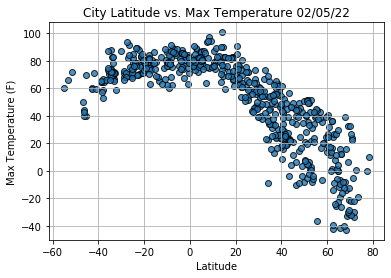

In [26]:
#create a scatter plot for the latitude vs. maximum temperature 
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

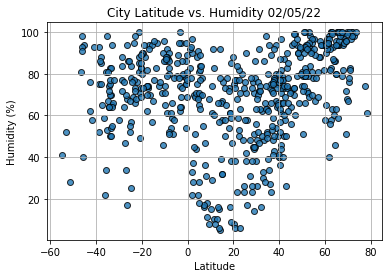

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

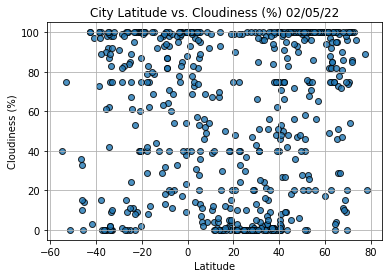

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

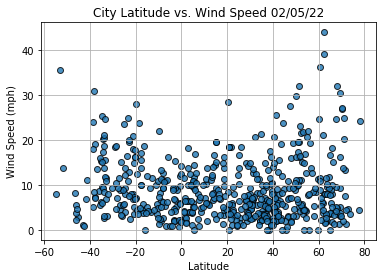

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

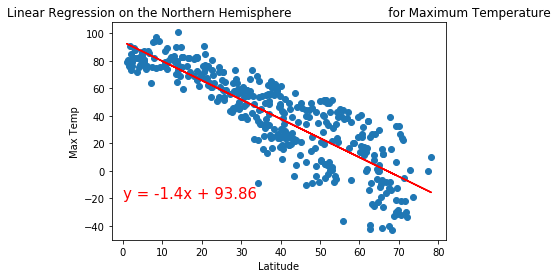

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

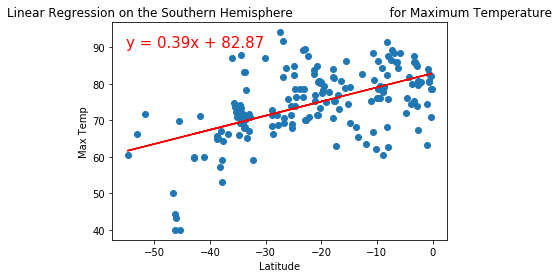

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

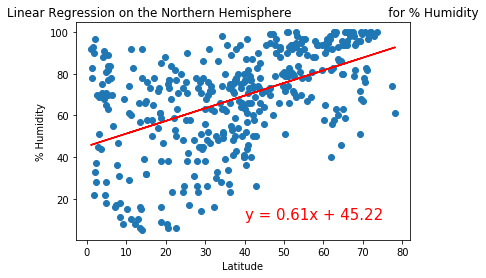

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

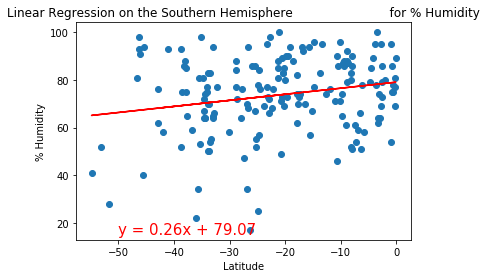

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

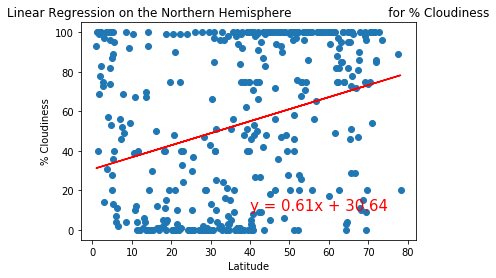

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

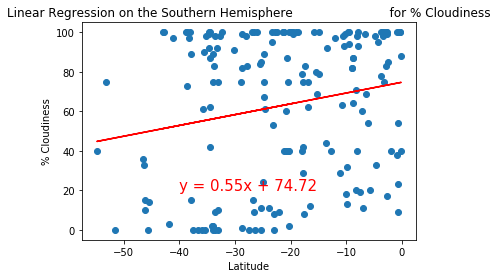

In [50]:
# Linear regression on the Souther Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-40,20))

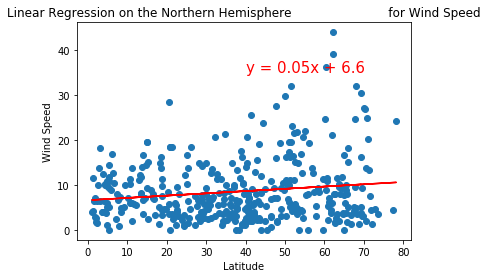

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

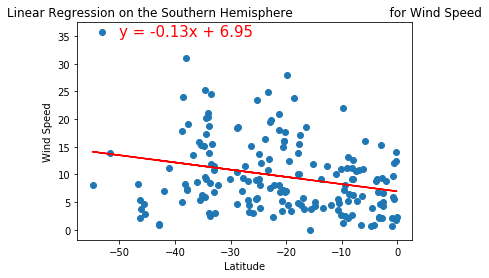

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))